<a href="https://colab.research.google.com/github/andluizsouza/Machine-Learning-tutorials/blob/master/5-Intro_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Deep Learning**

> Algoritmos de classificação de imagens

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Reading the dataset**

> Importando um dataset de imagens de roupas do [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
dataset = keras.datasets.fashion_mnist
((X_train, Y_train), (X_test, Y_test)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

> **70k imagens de 28x28 pixels**

*   60k imagens de treino
*   10k imagens de teste





> **Identificação das roupas**

In [ ]:
Y_train, Y_test

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [ ]:
Y_train.shape, Y_test.shape

((60000,), (10000,))

In [ ]:
print('Minimum label:', Y_train.min())
print('Maximum label:', Y_train.max())

Minimum label: 0
Maximum label: 9


In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

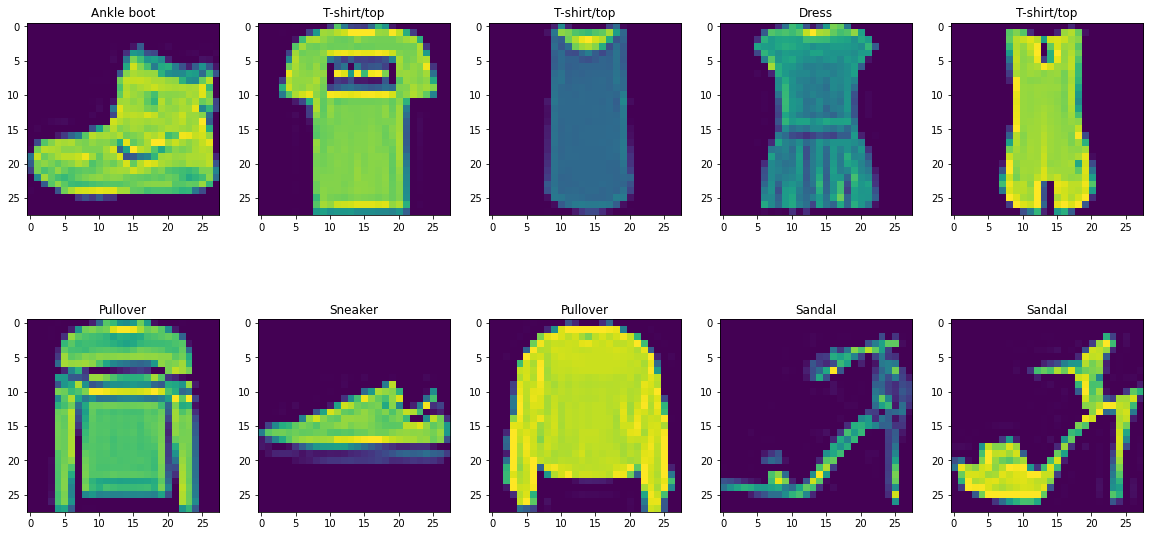

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.title(label_names[Y_train[i]])

## **Modeling**

> **Layer zero: input figures**
* Convertendo os arrays de imagem (28,28) para arrays flat (1, 28*28)

> **Layer one: dense connections**
* A próxima camada deve ser mais densa e conectar com todos os pontos da camada de entrada
* ReLu: funções não-lineares de classificação

> **Layer two: output classification**
* Softmax: array de probabilidades de acordo com as categorias para todos os inputs

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256, activation=tensorflow.nn.relu),
                          keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                          ])

> Compilando o modelo
* `optimizer='adam'`: multicategorical labels
* `loss=sparse_categorical_crossentropy`: perda de informação

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 4.0931


* **Como diminuir a perda?**
> Normalização dos pixels

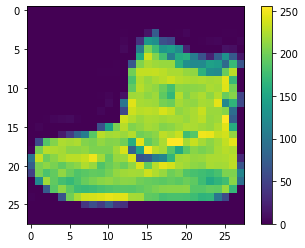

In [ ]:
plt.imshow(X_train[0])
plt.colorbar()

In [ ]:
X_train = X_train/255.
model.fit(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8922


**A perda de informação pela modelagem foi de 4.4554 para 0.8961**

e se adicionarmos mais uma camada?



In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256, activation=tensorflow.nn.relu),
                          keras.layers.Dense(128, activation=tensorflow.nn.relu),
                          keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                          ])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')
model.fit(X_train, Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4751


Aumentar o número de camadas internas não melhora necessariamente o índice de perda

**Número de treinamentos**
> devemos treinar o nosso modelo mais de uma vez pra que tenhamos resultados melhores

In [ ]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3591
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3239
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3004
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2806
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672


* O índice de perda está diminuindo conforme aumentamos o treinamento.
* Mas como saber quanto o modelo está acertando? Adicionando uma métrica!

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9028
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2456 - accuracy: 0.9077
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2328 - accuracy: 0.9120
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2254 - accuracy: 0.9139
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2142 - accuracy: 0.9187


**A acurácia do modelo ao longo do treinamento**

## **Prediction**

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
Y_pred = np.argmax(Y_pred, axis=1)
Y_diff = Y_pred-Y_test
score = 1 - Y_diff.sum()/len(Y_diff)
print("Accuracy score:", score)

Accuracy score: 0.8654


In [ ]:
loss, score = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 67.1593 - accuracy: 0.8527


## **Validation**

* Dividindo os dados para treino e validação

In [ ]:
info = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2076 - accuracy: 0.9208 - val_loss: 0.2087 - val_accuracy: 0.9180
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1960 - accuracy: 0.9255 - val_loss: 0.2128 - val_accuracy: 0.9190
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1926 - accuracy: 0.9263 - val_loss: 0.2157 - val_accuracy: 0.9188
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1830 - accuracy: 0.9314 - val_loss: 0.2259 - val_accuracy: 0.9162
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1785 - accuracy: 0.9328 - val_loss: 0.2155 - val_accuracy: 0.9182
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1729 - accuracy: 0.9347 - val_loss: 0.2439 - val_accuracy: 0.9081
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1662 - accuracy: 0.9365 - val_loss: 0.2318 - val_accuracy:

In [ ]:
info.history

{'accuracy': [0.9208124876022339,
  0.9254999756813049,
  0.9263125061988831,
  0.9314166903495789,
  0.9328333139419556,
  0.9347083568572998,
  0.9365000128746033,
  0.9385833144187927,
  0.9401249885559082,
  0.9418125152587891],
 'loss': [0.20757922530174255,
  0.19603298604488373,
  0.19258522987365723,
  0.1829768270254135,
  0.17849735915660858,
  0.17293110489845276,
  0.1662469059228897,
  0.16222086548805237,
  0.1564224511384964,
  0.15312165021896362],
 'val_accuracy': [0.9179999828338623,
  0.9190000295639038,
  0.918833315372467,
  0.9162499904632568,
  0.9181666374206543,
  0.9080833196640015,
  0.9154999852180481,
  0.9176666736602783,
  0.9114166498184204,
  0.9135000109672546],
 'val_loss': [0.2086954563856125,
  0.21283811330795288,
  0.21574169397354126,
  0.22585926949977875,
  0.21545177698135376,
  0.2438763827085495,
  0.23180629312992096,
  0.2516424059867859,
  0.24058149755001068,
  0.24322029948234558]}

Text(0, 0.5, 'Accuracy')

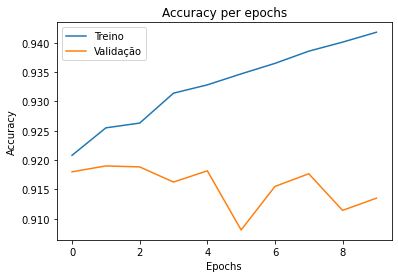

In [ ]:
plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.title('Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

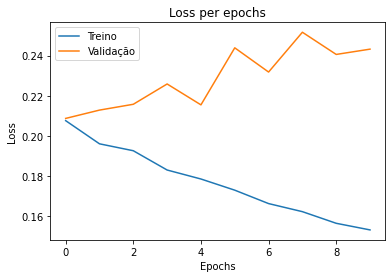

In [ ]:
plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.title('Loss per epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## **Under/Over-fitting**

**CUIDADO**: under and overfitting sobre os dados
* A acurácia e a perda de treino e validação devem ser iguais e estacionárias

**Dropout**: descartando/congelando algumas redes entre as épocas para minimizar os efeitos de aleatoriadade

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256, activation=tensorflow.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                          ])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
info = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5264 - accuracy: 0.8130 - val_loss: 0.4015 - val_accuracy: 0.8557
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3989 - accuracy: 0.8540 - val_loss: 0.3710 - val_accuracy: 0.8632
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3604 - accuracy: 0.8692 - val_loss: 0.3507 - val_accuracy: 0.8750
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3398 - accuracy: 0.8740 - val_loss: 0.3494 - val_accuracy: 0.8732
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.8817 - val_loss: 0.3355 - val_accuracy: 0.8815
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3102 - accuracy: 0.8848 - val_loss: 0.3346 - val_accuracy: 0.8777
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2962 - accuracy: 0.8880 - val_loss: 0.3246 - val_accuracy:

Text(0, 0.5, 'Accuracy')

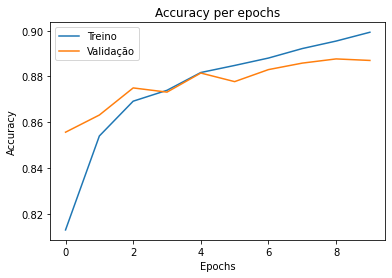

In [ ]:
plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.title('Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

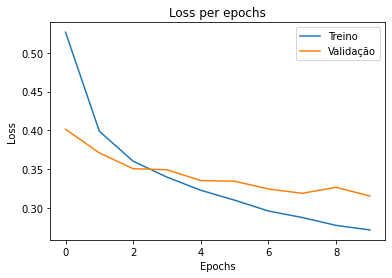

In [ ]:
plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.title('Loss per epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Agora os resultados estão um pouco mais estáveis

## **Saving the model**

In [ ]:
from tensorflow.keras.models import load_model
model.save('model.h5')

In [ ]:
model_saved = load_model('model.h5')